In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from os import listdir

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

from scipy.cluster.hierarchy import cut_tree

In [31]:
filepaths = [f for f in listdir("./data") if f.endswith('.csv')]
files = [pd.read_csv('./data/' + f, sep=",", encoding="ISO-8859-1", header=0) for f in filepaths]

In [32]:
cellphones = pd.concat(files)

In [33]:
cellphones.head()

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet
0,2013-11-03 00:00:00,1,0,0.2221,NaN,NaN,0.0534,NaN
1,2013-11-03 00:00:00,1,39,0.9891,0.8306,0.2481,0.5635,54.5778
2,2013-11-03 00:00:00,2,0,0.2223,NaN,NaN,0.0547,NaN
3,2013-11-03 00:00:00,2,39,0.9946,0.8315,0.2476,0.5748,54.7746
4,2013-11-03 00:00:00,3,0,0.2225,NaN,NaN,0.0560,NaN


In [34]:
cellphones.shape

(11349906, 8)

In [35]:
cellphones.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11349906 entries, 0 to 2407383
Data columns (total 8 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   datetime     11349906 non-null  object 
 1   CellID       11349906 non-null  int64  
 2   countrycode  11349906 non-null  int64  
 3   smsin        4434443 non-null   float64
 4   smsout       2615442 non-null   float64
 5   callin       3154714 non-null   float64
 6   callout      4798013 non-null   float64
 7   internet     5111758 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 779.3+ MB


In [36]:
cellphones.describe()

,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.134991e+07,1.134991e+07,4.434443e+06,2.615442e+06,3.154714e+06,4.798013e+06,5.111758e+06
mean,5.314250e+03,3.547148e+02,8.150856e+00,7.676556e+00,7.841837e+00,5.840318e+00,1.025373e+02
std,2.725083e+03,4.282077e+03,2.926912e+01,2.651032e+01,3.132440e+01,2.802188e+01,4.402995e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.163000e+03,3.300000e+01,9.720000e-02,8.840000e-02,5.530000e-02,5.460000e-02,5.730000e-02
50%,5.452000e+03,4.300000e+01,5.758000e-01,5.267000e-01,2.298000e-01,2.041000e-01,2.017000e-01
75%,7.558000e+03,9.000000e+01,4.706600e+00,4.422275e+00,2.044700e+00,9.986000e-01,3.105000e+00
max,1.000000e+04,9.725900e+04,2.288739e+03,2.270682e+03,1.328088e+03,1.511686e+03,2.375316e+04


In [37]:
df_null = round(100*(cellphones.isnull().sum())/len(cellphones), 2)
df_null

datetime        0.00
CellID          0.00
countrycode     0.00
smsin          60.93
smsout         76.96
callin         72.20
callout        57.73
internet       54.96
dtype: float64

In [38]:
cellphones['smsin'] = cellphones['smsin'].fillna(0)
cellphones['smsout'] = cellphones['smsin'].fillna(0)
cellphones['callin'] = cellphones['callin'].fillna(0)
cellphones['callout'] = cellphones['callout'].fillna(0)
cellphones['internet'] = cellphones['internet'].fillna(0)

In [39]:
df_null = round(100*(cellphones.isnull().sum())/len(cellphones), 2)
df_null

datetime       0.0
CellID         0.0
countrycode    0.0
smsin          0.0
smsout         0.0
callin         0.0
callout        0.0
internet       0.0
dtype: float64

In [40]:
cellphones.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11349906 entries, 0 to 2407383
Data columns (total 8 columns):
 #   Column       Non-Null Count     Dtype  
---  ------       --------------     -----  
 0   datetime     11349906 non-null  object 
 1   CellID       11349906 non-null  int64  
 2   countrycode  11349906 non-null  int64  
 3   smsin        11349906 non-null  float64
 4   smsout       11349906 non-null  float64
 5   callin       11349906 non-null  float64
 6   callout      11349906 non-null  float64
 7   internet     11349906 non-null  float64
dtypes: float64(5), int64(2), object(1)
memory usage: 779.3+ MB


In [41]:
cellphones.describe()

,CellID,countrycode,smsin,smsout,callin,callout,internet
count,1.134991e+07,1.134991e+07,1.134991e+07,1.134991e+07,1.134991e+07,1.134991e+07,1.134991e+07
mean,5.314250e+03,3.547148e+02,3.184564e+00,3.184564e+00,2.179644e+00,2.468912e+00,4.618063e+01
std,2.725083e+03,4.282077e+03,1.872227e+01,1.872227e+01,1.688407e+01,1.844632e+01,2.998577e+02
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.163000e+03,3.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.452000e+03,4.300000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,7.558000e+03,9.000000e+01,2.106000e-01,2.106000e-01,1.290000e-02,1.288000e-01,1.529000e-01
max,1.000000e+04,9.725900e+04,2.288739e+03,2.288739e+03,1.328088e+03,1.511686e+03,2.375316e+04


In [42]:
# Changing the datatype of Customer Id as per Business understanding

cellphones.loc[:,'CellID'] = cellphones.loc[:,'CellID'].astype(str)

In [70]:
# New Attribute : Monetary

cellphones.loc[:,'Amount'] = cellphones.loc[:,'smsin']+cellphones.loc[:,'smsout']+cellphones.loc[:,'callin']+cellphones.loc[:,'callout']+cellphones.loc[:,'internet']
rfm_m = cellphones.groupby('CellID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()


,CellID,Amount
0,1,8719.1376
1,10,5698.6126
2,100,15519.9513
3,1000,19006.9270
4,10000,18465.0379


In [71]:
rfm_m.shape

(10000, 2)

In [72]:
rfm_m.describe()

,Amount
count,1.000000e+04
mean,6.491955e+04
std,1.052507e+05
min,2.818592e+02
25%,1.291543e+04
50%,3.129082e+04
75%,6.726293e+04
max,1.300141e+06


array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

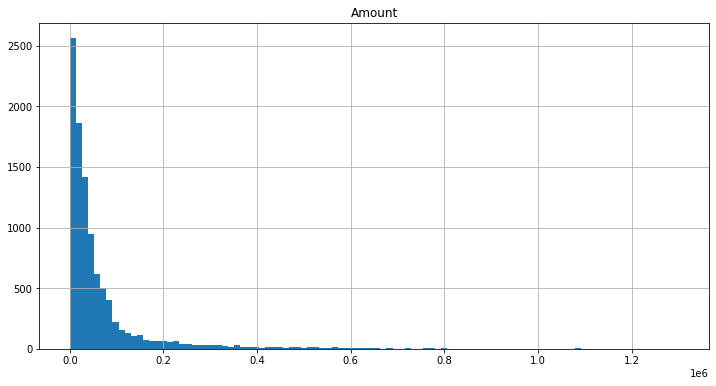

In [73]:
rfm_m.hist(column='Amount', bins=100, figsize=(12,6))

Text(0.5, 0, 'Attributes')

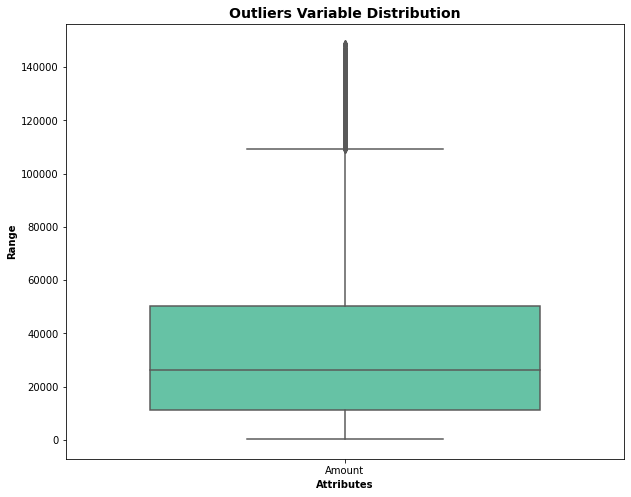

In [74]:
attributes = ['Amount']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [76]:
###########
# Removing (statistical) outliers for Amount
Q1 = rfm_m.Amount.quantile(0.25)
Q3 = rfm_m.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm_m = rfm_m[(rfm_m.Amount >= Q1 - 1.5*IQR) & (rfm_m.Amount <= Q3 + 1.5*IQR)]

Text(0.5, 0, 'Attributes')

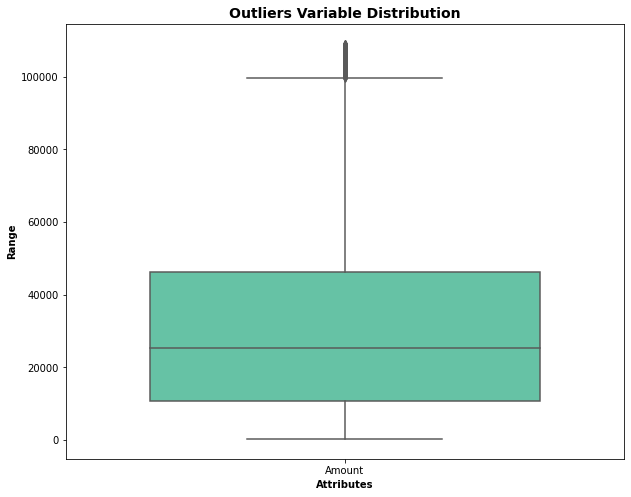

In [77]:
attributes = ['Amount']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

array([[<AxesSubplot:title={'center':'Amount'}>]], dtype=object)

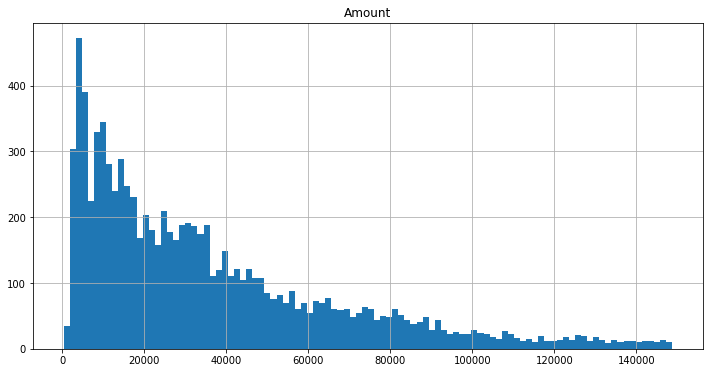

In [78]:
rfm_m.hist(column='Amount', bins=100, figsize=(12,6))

In [47]:
# New Attribute : Frequency

rfm_f = cellphones.groupby('CellID')['datetime'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns = ['CellID', 'Frequency']
rfm_f.head()


,CellID,Frequency
0,1,661
1,10,592
2,100,1137
3,1000,904
4,10000,915


array([[<AxesSubplot:title={'center':'Frequency'}>]], dtype=object)

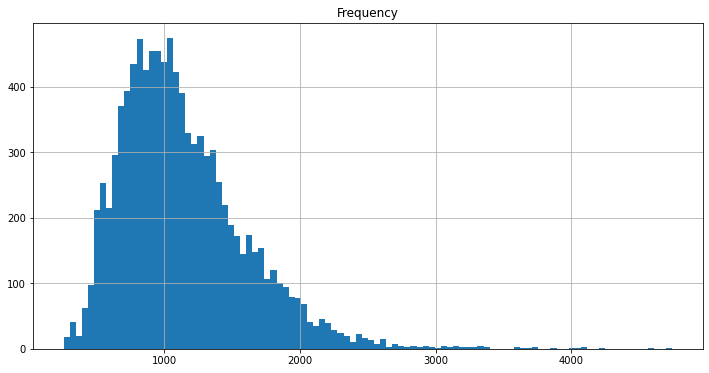

In [48]:
rfm_f.hist(column='Frequency', bins=100, figsize=(12,6))

In [49]:
rfm_f.describe()

,Frequency
count,10000.000000
mean,1134.990600
std,464.122905
min,256.000000
25%,805.000000
50%,1050.000000
75%,1377.000000
max,4746.000000


In [50]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CellID', how='inner')
rfm.head()

,CellID,Amount,Frequency
0,1,8719.1376,661
1,10,5698.6126,592
2,100,15519.9513,1137
3,1000,19006.9270,904
4,10000,18465.0379,915


In [51]:
# New Attribute : Recency

# Convert to datetime to proper datatype

cellphones.loc[:,'datetime'] = pd.to_datetime(cellphones.loc[:,'datetime'],format='%Y-%m-%d %H:%M:%S')

In [52]:
# Compute the maximum date to know the last transaction date

max_date = max(cellphones['datetime'])
max_date

Timestamp('2013-11-07 23:00:00')

In [53]:
# Compute the difference between max date and transaction date

cellphones.loc[:,'Diff'] = max_date - cellphones.loc[:,'datetime']
cellphones.head(10)

,datetime,CellID,countrycode,smsin,smsout,callin,callout,internet,Amount,Diff
0,2013-11-03,1,0,0.2221,0.2221,0.0000,0.0534,0.0000,0.4976,4 days 23:00:00
1,2013-11-03,1,39,0.9891,0.9891,0.2481,0.5635,54.5778,57.3676,4 days 23:00:00
2,2013-11-03,2,0,0.2223,0.2223,0.0000,0.0547,0.0000,0.4993,4 days 23:00:00
3,2013-11-03,2,39,0.9946,0.9946,0.2476,0.5748,54.7746,57.5862,4 days 23:00:00
4,2013-11-03,3,0,0.2225,0.2225,0.0000,0.0560,0.0000,0.5010,4 days 23:00:00
5,2013-11-03,3,39,1.0004,1.0004,0.2471,0.5868,54.9841,57.8188,4 days 23:00:00
6,2013-11-03,4,0,0.2215,0.2215,0.0000,0.0499,0.0000,0.4929,4 days 23:00:00
7,2013-11-03,4,39,0.9734,0.9734,0.2496,0.5307,54.0077,56.7348,4 days 23:00:00
8,2013-11-03,5,0,0.2031,0.2031,0.0000,0.0454,0.0000,0.4516,4 days 23:00:00
9,2013-11-03,5,39,0.9036,0.9036,0.2238,0.4854,48.8837,51.4001,4 days 23:00:00


In [54]:
# Compute last transaction date to get the recency of customers

rfm_p = cellphones.groupby('CellID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head()

,CellID,Diff
0,1,0 days
1,10,0 days
2,100,0 days
3,1000,0 days
4,10000,0 days


In [55]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

,CellID,Diff
0,1,0
1,10,0
2,100,0
3,1000,0
4,10000,0


array([[<AxesSubplot:title={'center':'Diff'}>]], dtype=object)

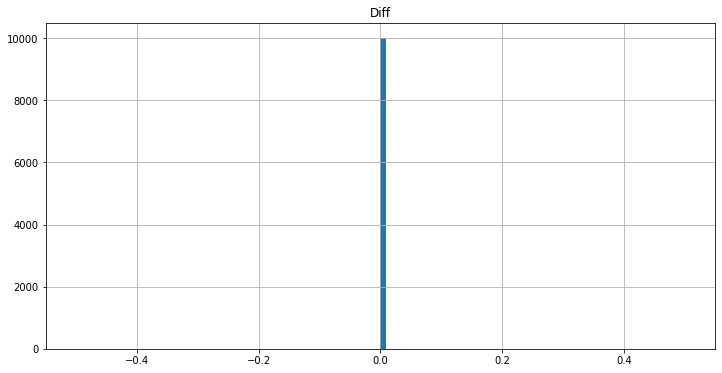

In [56]:
rfm_p.hist(column='Diff', bins=100, figsize=(12,6))

In [57]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CellID', how='inner')
rfm.columns = ['CellID', 'Amount', 'Frequency', 'Recency']
rfm.head()

,CellID,Amount,Frequency,Recency
0,1,8719.1376,661,0
1,10,5698.6126,592,0
2,100,15519.9513,1137,0
3,1000,19006.9270,904,0
4,10000,18465.0379,915,0


Text(0.5, 0, 'Attributes')

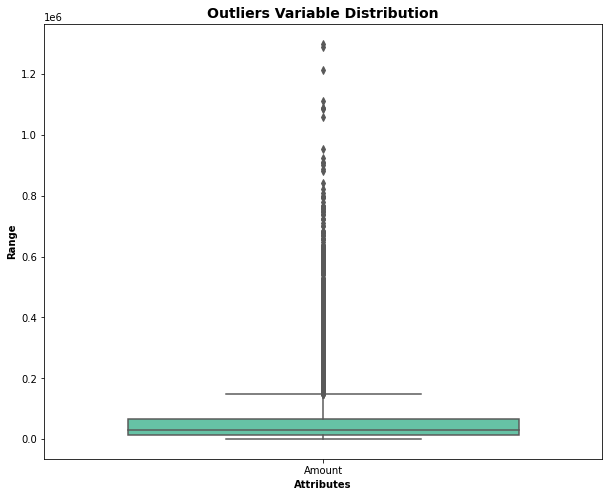

In [58]:

attributes = ['Amount']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Text(0.5, 0, 'Attributes')

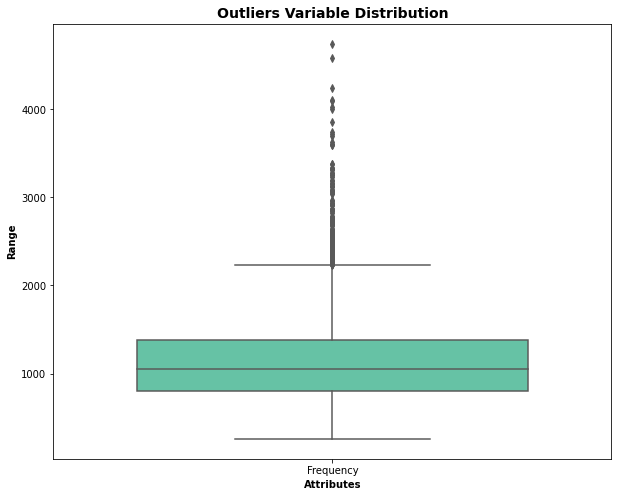

In [59]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Frequency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

Text(0.5, 0, 'Attributes')

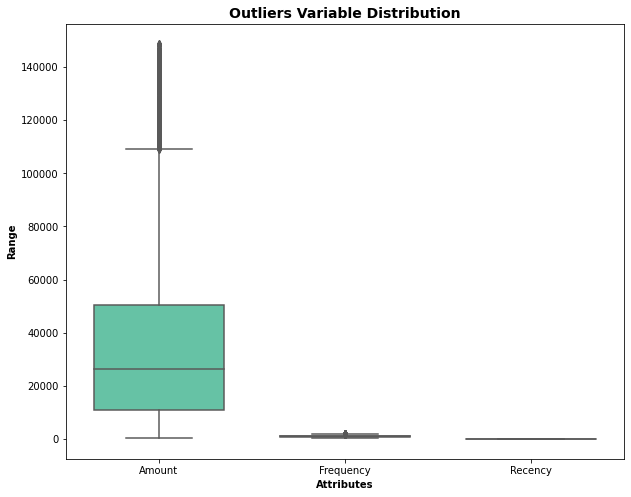

In [61]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [60]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.25)
Q3 = rfm.Amount.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.25)
Q3 = rfm.Recency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.25)
Q3 = rfm.Frequency.quantile(0.75)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

<AxesSubplot:>

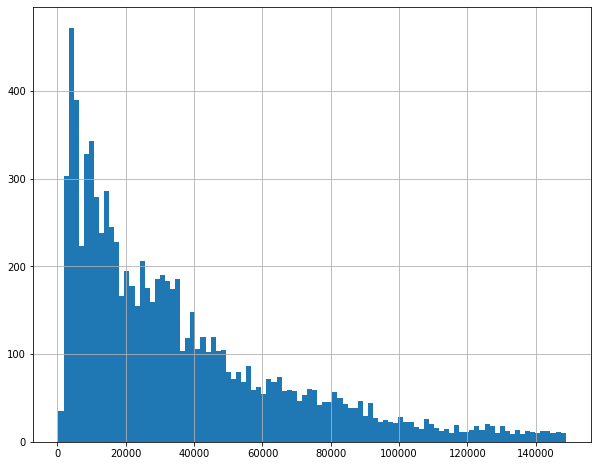

In [62]:
rfm.Amount.hist(bins=100)

In [63]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(8795, 3)

In [64]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Amount', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Amount,Frequency,Recency
0,-0.857166,-1.056773,0.0
1,-0.952743,-1.249088,0.0
2,-0.641973,0.269920,0.0
3,-0.531637,-0.379491,0.0
4,-0.548784,-0.348832,0.0


In [65]:
rfm_df_scaled.describe()

,Amount,Frequency,Recency
count,8.795000e+03,8.795000e+03,8795.0
mean,-8.644465e-17,-1.777367e-17,0.0
std,1.000057e+00,1.000057e+00,0.0
min,-1.124141e+00,-2.185577e+00,0.0
25%,-7.819772e-01,-7.446102e-01,0.0
50%,-2.978429e-01,-1.091354e-01,0.0
75%,4.588624e-01,6.378263e-01,0.0
max,3.574213e+00,2.809032e+00,0.0


In [66]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

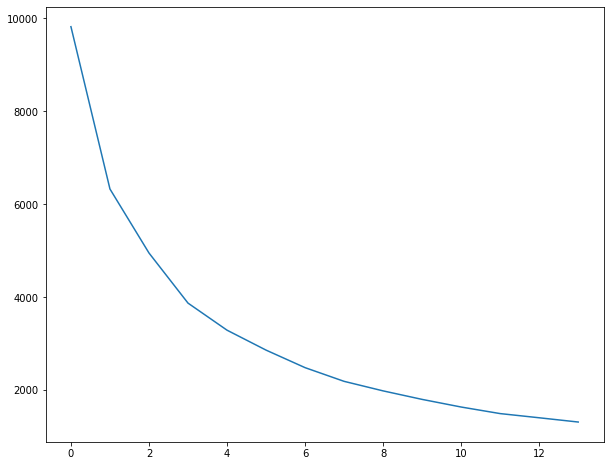

In [67]:
# Elbow-curve/SSD

ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)

In [68]:
for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.4298342399322537
For n_clusters=3, the silhouette score is 0.4296495694469032
For n_clusters=4, the silhouette score is 0.3621827818007274
For n_clusters=5, the silhouette score is 0.380580256528497
For n_clusters=6, the silhouette score is 0.38157532903710106
For n_clusters=7, the silhouette score is 0.3540930159166553
For n_clusters=8, the silhouette score is 0.35705684357396555
For n_clusters=9, the silhouette score is 0.35986234316290866
For n_clusters=10, the silhouette score is 0.3679141825782763
For n_clusters=11, the silhouette score is 0.3545743730649437
For n_clusters=12, the silhouette score is 0.3537252357595923
For n_clusters=13, the silhouette score is 0.35683209133695437
For n_clusters=14, the silhouette score is 0.3614466577965994
For n_clusters=15, the silhouette score is 0.35741109696469403


In [55]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [56]:
kmeans.labels_

array([0, 0, 2, ..., 0, 0, 0])

In [57]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

,CellID,Amount,Frequency,Recency,Cluster_Id
0,1,8719.1376,661,0,0
1,10,5698.6126,592,0,0
2,100,15519.9513,1137,0,2
3,1000,19006.9270,904,0,0
4,10000,18465.0379,915,0,0


<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

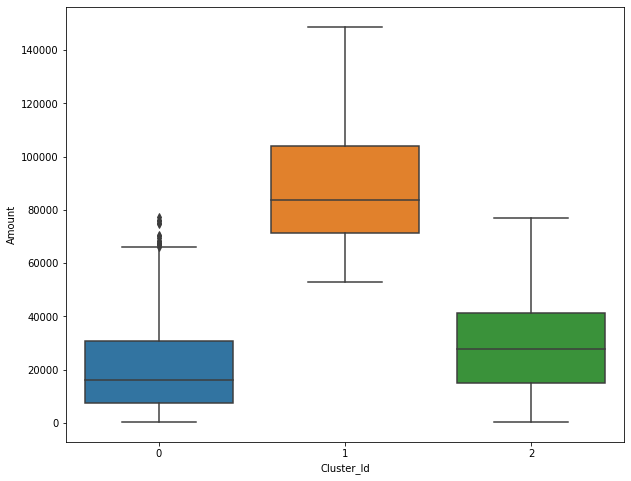

In [58]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

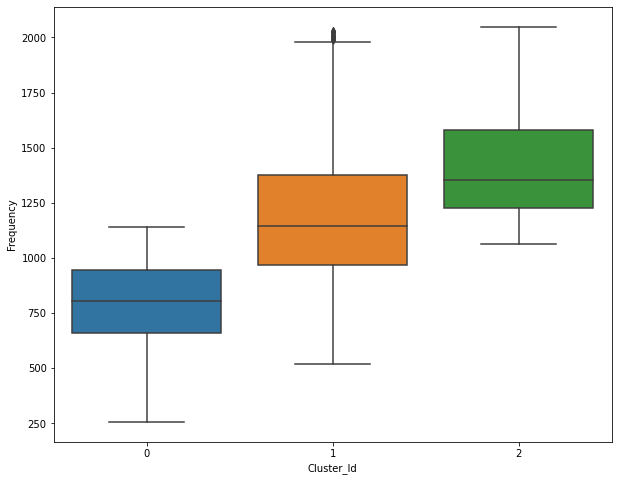

In [59]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

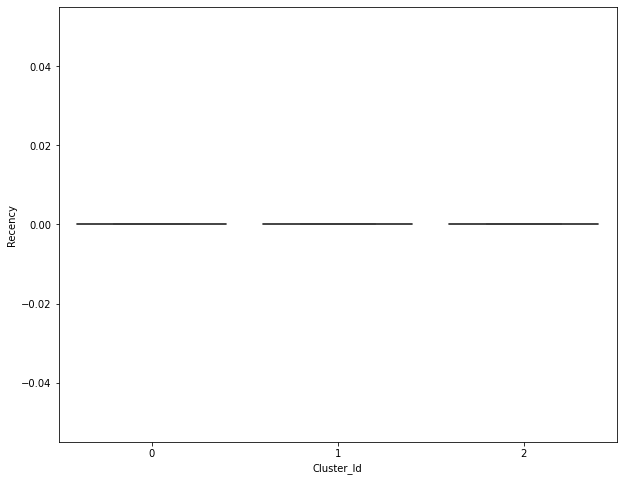

In [60]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

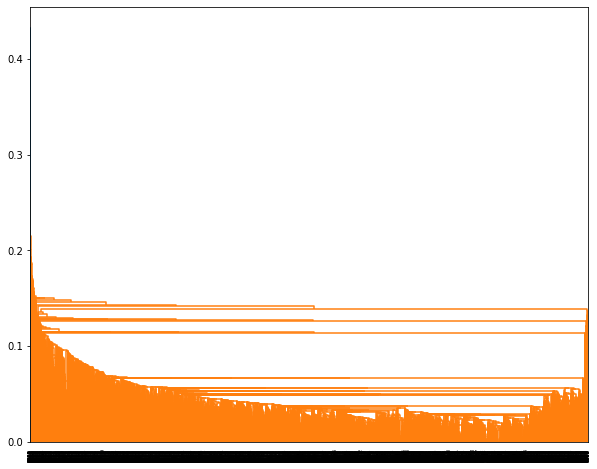

In [61]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

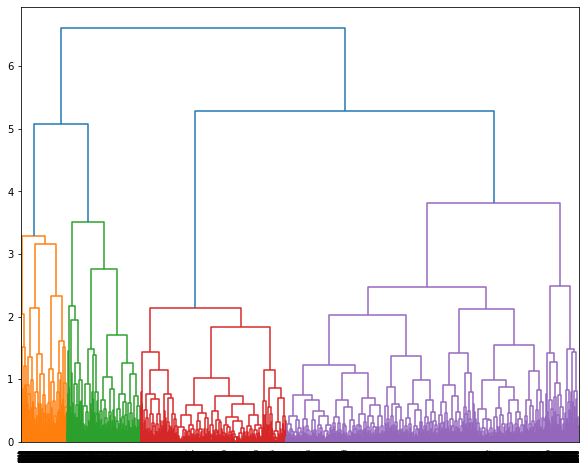

In [62]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

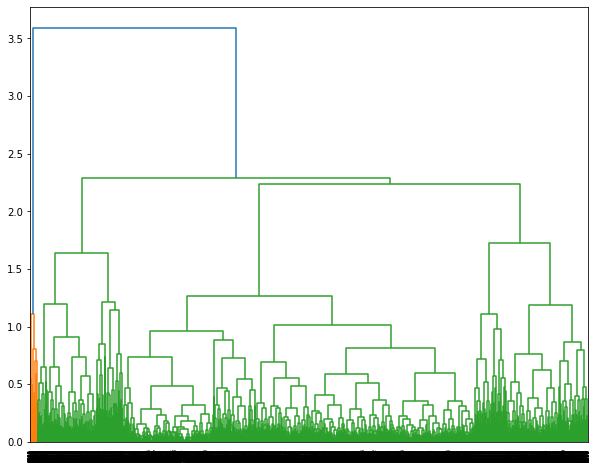

In [63]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [64]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=4).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [65]:
rfm['Cluster_Labels'] = cluster_labels
rfm.head()

,CellID,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
0,1,8719.1376,661,0,0,0
1,10,5698.6126,592,0,0,0
2,100,15519.9513,1137,0,2,0
3,1000,19006.9270,904,0,0,0
4,10000,18465.0379,915,0,0,0


<AxesSubplot:xlabel='Cluster_Labels', ylabel='Amount'>

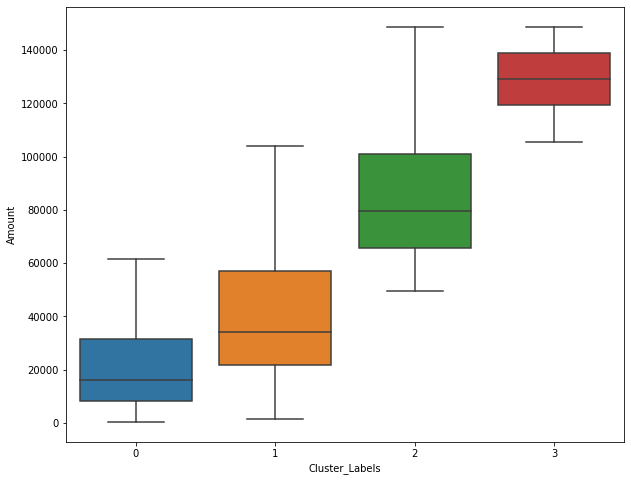

In [66]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

In [67]:
rfm[rfm['Cluster_Labels'] == 3].describe()

,Amount,Frequency,Recency,Cluster_Id,Cluster_Labels
count,124.000000,124.000000,124.0,124.0,124.0
mean,129079.725461,1626.959677,0.0,1.0,3.0
std,11855.874959,184.419564,0.0,0.0,0.0
min,105612.131600,1363.000000,0.0,1.0,3.0
25%,119297.151425,1451.750000,0.0,1.0,3.0
50%,129335.277900,1616.500000,0.0,1.0,3.0
75%,139011.763450,1755.500000,0.0,1.0,3.0
max,148765.179000,2030.000000,0.0,1.0,3.0
